In [1]:
import os, shutil

In [2]:
original = '/home/james/Downloads/data'

In [3]:
base = '/home/james/Program/KerasLearning/data/dogs-vs-cats'

train_dir = os.path.join(base, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

In [4]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

In [5]:
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/home/james/Downloads/data/train/cat.0.jpg'

In [26]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original + '/train/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [8]:
from keras import layers
from keras import models
from keras import optimizers

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6870 - acc: 0.5230 - val_loss: 0.6618 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6513 - acc: 0.6085 - val_loss: 0.6476 - val_acc: 0.6000
Epoch 3/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6057 - acc: 0.6625 - val_loss: 0.6088 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5670 - acc: 0.7100 - val_loss: 0.5963 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5300 - acc: 0.7215 - val_loss: 0.5820 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 9s 93ms/step - loss: 0.4998 - acc: 0.7505 - val_loss: 0.5736 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4732 - acc: 0.7785 - val_loss: 0.5499 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 9s 93ms/step 

In [18]:
model.save('cats_and_dogs_small_1.h5')

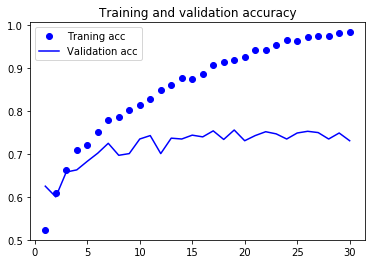

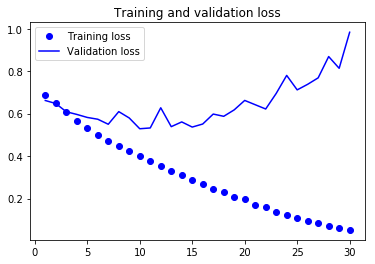

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# Using data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [23]:
from keras.preprocessing import image

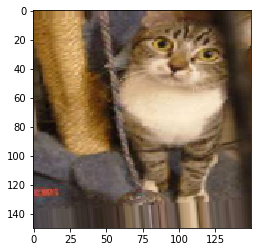

In [26]:
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    if i % 4 == 0:
        break
plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 229ms/step - loss: 8.0249 - acc: 0.4994 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 21s 208ms/step - loss: 8.1093 - acc: 0.4969 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 21s 209ms/step - loss: 8.0236 - acc: 0.5022 - val_loss: 0.7072 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 21s 208ms/step - loss: 7.9673 - acc: 0.5000 - val_loss: 0.6988 - val_acc: 0.5000
Epoch 5/100
100/100 [==============================] - 21s 214ms/step - loss: 7.9566 - acc: 0.5013 - val_loss: 0.7029 - val_acc: 0.5000
Epoch 6/100
100/100 [==============================] - 21s 208ms/step - loss: 8.1494 - acc: 0.4944 - val_loss: 0.7029 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 22s 216ms/step - loss: 3.7746 - acc: 0.5134 - val_loss: 0.6928 - val_acc: 0.5380
Epoch 

100/100 [==============================] - 21s 205ms/step - loss: 0.4879 - acc: 0.7557 - val_loss: 0.9447 - val_acc: 0.5000
Epoch 61/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4991 - acc: 0.7622 - val_loss: 0.9757 - val_acc: 0.5000
Epoch 62/100
100/100 [==============================] - 21s 208ms/step - loss: 0.5077 - acc: 0.7534 - val_loss: 0.9108 - val_acc: 0.5000
Epoch 63/100
100/100 [==============================] - 22s 216ms/step - loss: 0.5039 - acc: 0.7616 - val_loss: 0.9581 - val_acc: 0.5000
Epoch 64/100
100/100 [==============================] - 22s 220ms/step - loss: 0.4932 - acc: 0.7594 - val_loss: 0.9645 - val_acc: 0.5000
Epoch 65/100
100/100 [==============================] - 21s 206ms/step - loss: 0.4886 - acc: 0.7569 - val_loss: 0.9618 - val_acc: 0.5000
Epoch 66/100
100/100 [==============================] - 21s 206ms/step - loss: 0.4765 - acc: 0.7725 - val_loss: 1.0469 - val_acc: 0.5000
Epoch 67/100
100/100 [==============================] 

In [32]:
model.save('cats_and_dogs_small_2.h5')

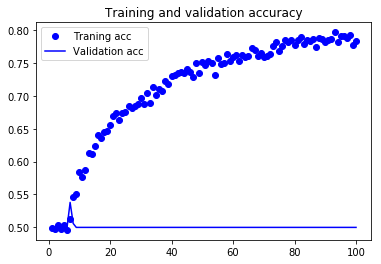

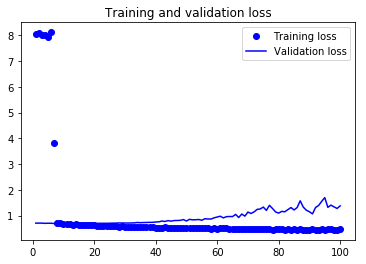

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()